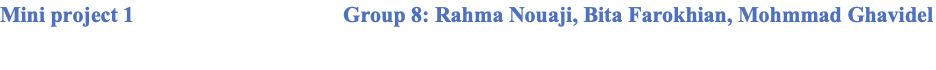

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import random
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# 1- Dataset 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

texte en italique

In [ ]:
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Applied ML Mini project 1/Dataset/Qualitative_Bankruptcy.data.txt')

In [ ]:
#log in rahma
df=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Applied ML Mini project 1/Dataset/ENB2012_data.xlsx')

In [ ]:
#login bita
df=pd.read_excel(r'/content/drive/MyDrive/ENB2012_data.xlsx')


In [ ]:
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness, X2 Surface Area,
X3 Wall Area,
X4 Roof Area,
X5 Overall Height,
X6 Orientation,
X7 Glazing Area,
X8 Glazing Area Distribution,
y1 Heating Load,
y2 Cooling Load.

In [ ]:
df.columns = ["Relative Compactness","Surface Area","Wall Area",
                "Roof Area", "Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [ ]:
df.head(20)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97



# 1-1 Exploring data

In [ ]:
df.shape

(768, 10)

This dataset houses 768 observations and 10 features. It has 8 independant variables used to predict 2 dependant variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isna().sum()


Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

According to the previous 2 commands, the data has only integer and float variables and it does not hold any missing values.

# 1-2 Data overall statistics

> Indented block



In [ ]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000






*  We can conclude that there are no outliers because there is no significant difference between the 75th quantile and the maximum value for any of the features.


*   The range of values of the features is not the same for that we choose to normalize the date in order to make it in the same scale.




In [ ]:

for col in df.columns:
    print("{c} Column has {u} unique values".format(c=col,u = np.count_nonzero(df[col].unique())))

Relative Compactness Column has 12 unique values
Surface Area Column has 12 unique values
Wall Area Column has 7 unique values
Roof Area Column has 4 unique values
Overall Height Column has 2 unique values
Orientation Column has 4 unique values
Glazing Area Column has 3 unique values
Glazing Area Distribution Column has 5 unique values
Heating Load Column has 587 unique values
Cooling Load Column has 636 unique values


Analysing target variables

In [ ]:
##Counting unique elements in Cooling Load column
np.count_nonzero(df['Heating Load'].unique())

636

In [ ]:
##Counting unique elements in Heating Load column
np.count_nonzero(df['Cooling Load'].unique())

587

Target variables are numerical.

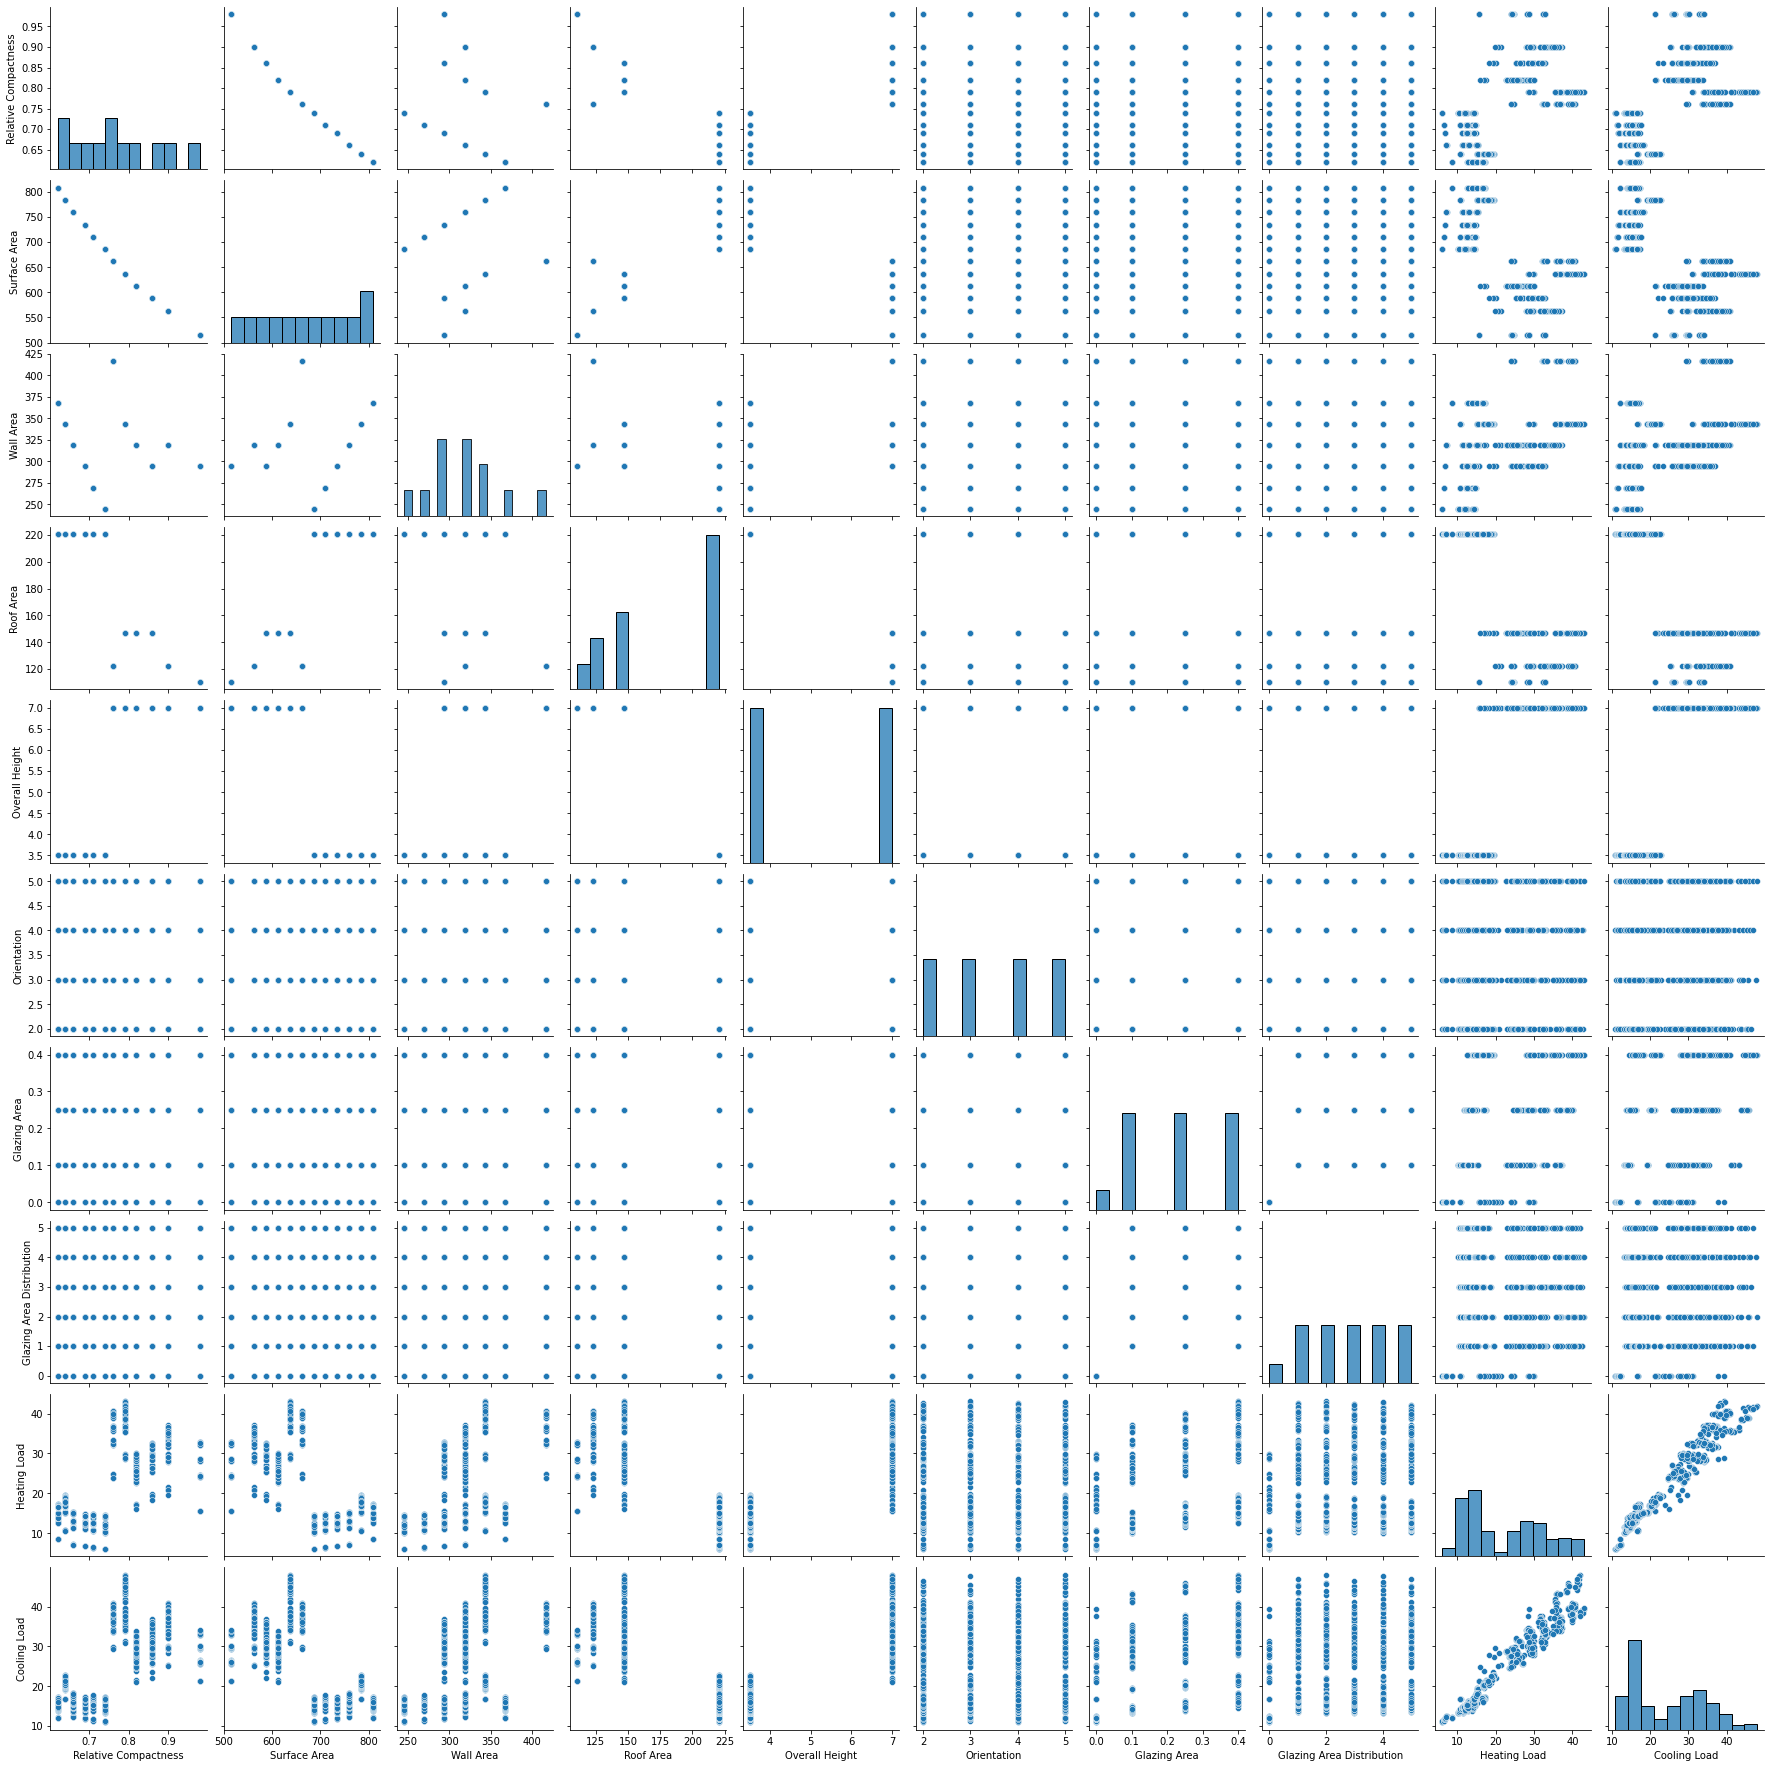

In [ ]:
sns.pairplot(df)

In [ ]:
round(df.corr(),3)

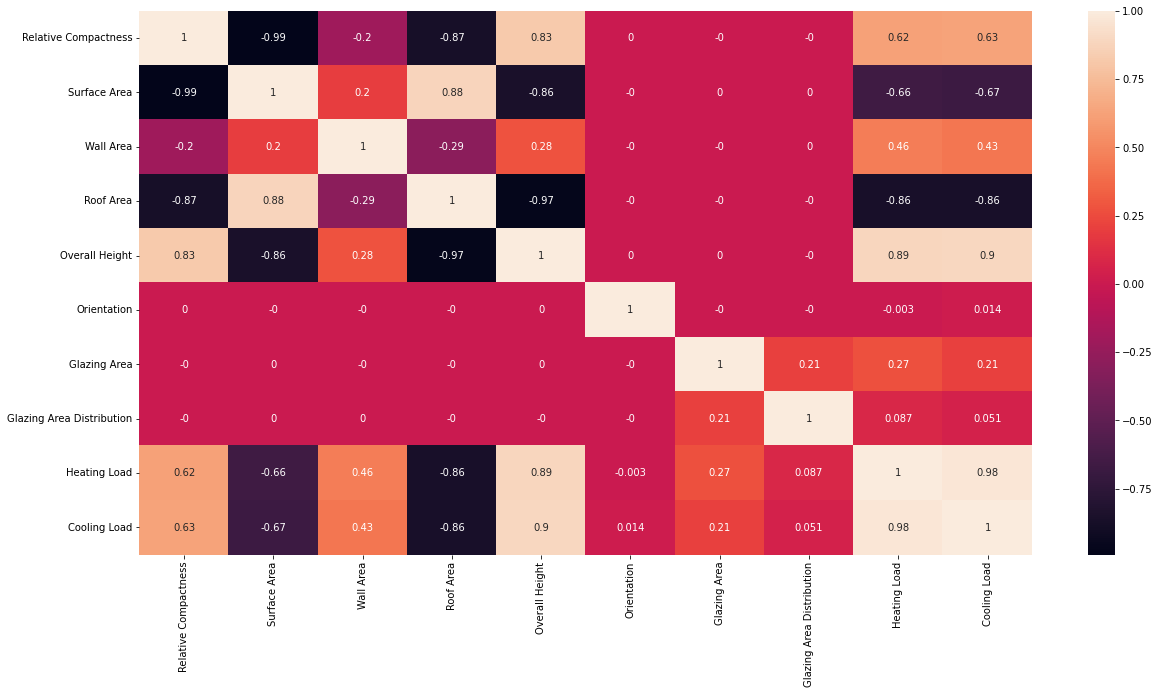

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),3), annot=True)



*   We have "Orientation" and "Glazing Area distribution" that are poorly correlated to the target variables so we suggest **to drop them.**
*   The highest positive correlation is between target variables and Overall height. We notice the highest negative correlation of target variables is with Roof Area.

*  We noticed also a high correlation between certain independant variables:
Relative Compactness with surface Area, Roof Area and Overall Height.
Surface Area with Roof Area and Overall height ( We could drop surface area or Relative Compactness as it they are  highly correlated and the two other features are highly correlated to target variable hence they are more important to be kept for prediction)( I choose relative compactness because less correlated than surface area to the target variables)

I would say we drop "Orientation"  "Glazing Area distribution" and " Relative Compactness"






In [ ]:
## data distribution

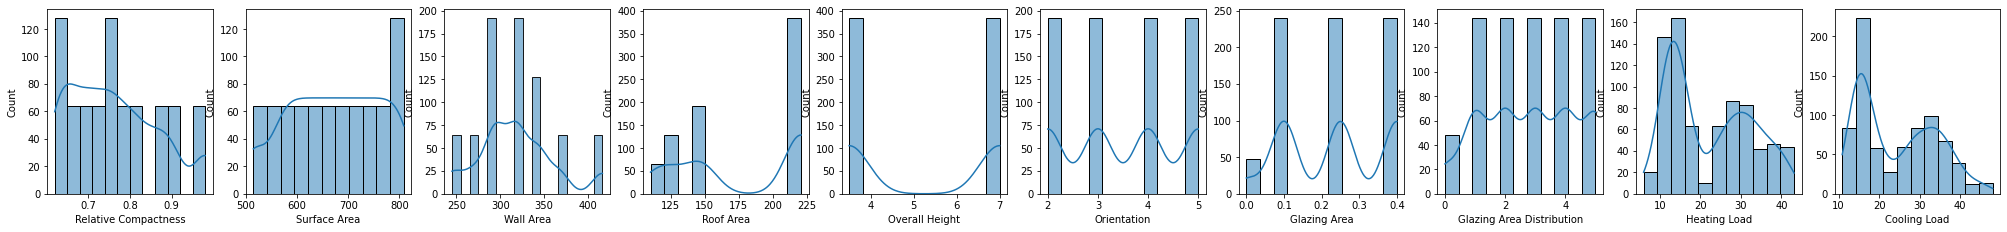

In [ ]:
plt.figure(figsize=(35,36))

l = df.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
for i in range(0,len(l)):
    plt.subplot(number_of_rows ,number_of_columns,i+1)
    sns.histplot(df[l[i]],kde=True)
plt.show()



> The features have an overall uniform distribution with a combination of normal distribution for the target variables.



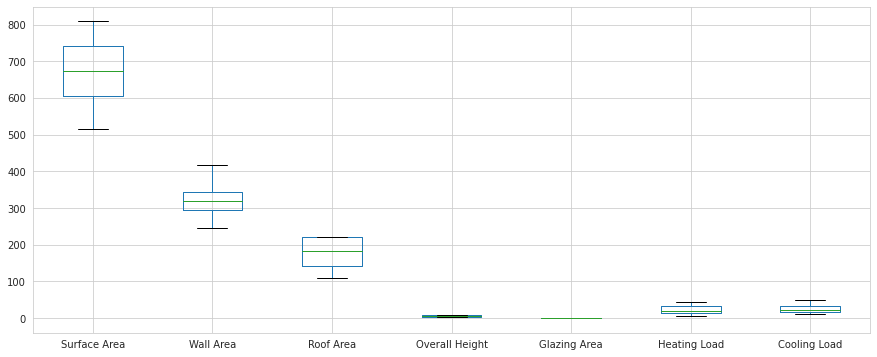

In [ ]:
plt.figure(figsize=(15,6))

boxplot = df.boxplot(column= ["Surface Area","Wall Area",
                "Roof Area", "Overall Height","Glazing Area", "Heating Load", "Cooling Load"] )
boxplot.plot()
plt.show()


There are no outliers in this dataset.

In [ ]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000




> By looking at the previous experiments, we could notice that for example the mean of surface area is around 3000 times the mean of glazing area, hence the gap between the scale of the different feature. For that we need to perform normalization on the data in order to put all the values on the same scale.



#1-3 Data Cleaning and model fitting


Dropping using SelectKbest

We started by selecting 5 features at the beginning by dropping only surface Area however, it yielded bad performance. Therefore, we opted to drop another feature with a high correlation with the target variables which is Roof Area.

In [ ]:
from sklearn.feature_selection import SelectKBest,  f_regression

In [ ]:
X=df.iloc[:,0:8]
Y=df.iloc[:,9]

In [ ]:
Y

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling Load, Length: 768, dtype: float64

In [ ]:

select = SelectKBest(score_func=f_regression,k=6)
z = select.fit_transform(X,Y)

cols_idxs = select.get_support(indices=True)


In [ ]:
features_df_new = X.iloc[:,cols_idxs]
features_df_new.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area'],
      dtype='object')

In [ ]:
features=features_df_new.drop(columns=['Surface Area','Roof Area'])
features.columns

Index(['Relative Compactness', 'Wall Area', 'Overall Height', 'Glazing Area'], dtype='object')

In [ ]:
columns=[ 'temperature', 'temperature felt ',
       'Overall Height', 'Glazing Area']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new= pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [ ]:
df_new.describe()

,Relative Compactness,Wall Area,Overall Height,Glazing Area
count,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.428571,0.500000,0.585938
std,0.293826,0.254382,0.500326,0.333051
min,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.285714,0.000000,0.250000
50%,0.361111,0.428571,0.500000,0.625000
75%,0.583333,0.571429,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
target=['Heating Load','Cooling Load']
X=df_new[columns].copy()
y=df[target]
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=2,
                                   test_size=0.2,
                                   shuffle=True)






In [ ]:
X_train

,Relative Compactness,Wall Area,Overall Height,Glazing Area
370,0.194444,0.285714,0.0,0.625
368,0.194444,0.285714,0.0,0.625
724,0.777778,0.428571,1.0,1.000
544,0.472222,0.571429,1.0,1.000
642,0.472222,0.571429,1.0,1.000
...,...,...,...,...
654,0.250000,0.142857,0.0,1.000
251,0.666667,0.285714,1.0,0.250
729,0.666667,0.285714,1.0,1.000
705,0.194444,0.285714,0.0,1.000


In [ ]:
class LinearRegression:

    def __init__(self, add_bias=True):
        self.add_bias = add_bias

        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]

        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.lstsq(x, y)[0]


                #return w for the least square difference


        return self


    def predict(self, x):
        N=x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh


In [ ]:

model_CF = LinearRegression()

y_pred=model_CF.fit(X_train,y_train).predict(X_test)


<ipython-input-432-1d02d3df95c3>:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]


In [ ]:
y_test

,Heating Load,Cooling Load
118,33.12,34.17
153,26.47,31.01
175,10.70,13.87
522,16.76,20.19
737,41.96,37.70
...,...,...
533,37.24,36.38
445,24.96,29.43
2,15.55,21.33
365,12.29,15.40


In [ ]:
model_CF.w

array([[-6.20301964, -8.04492209],
       [ 5.49256187,  2.80034256],
       [20.28818004, 20.56271189],
       [ 8.21551564,  6.10406754],
       [ 7.56440445, 12.81922164]])

In [ ]:

def r2_score(y_real,y_pred):
    corr_coef = np.corrcoef(y_real,y_pred)[0][1]
    r2 = corr_coef**2
    return r2
def MAE(y_real,y_pred):
    m = sum(abs(y_real-y_pred))/len(y_pred)
    return m
def MSE(y_real,y_pred):

    m = np.square(np.subtract(y_real,y_pred)).mean()
    return m

In [ ]:
y_test.iloc[:,0]

118    33.12
153    26.47
175    10.70
522    16.76
737    41.96
       ...  
533    37.24
445    24.96
2      15.55
365    12.29
84     11.68
Name: Heating Load, Length: 154, dtype: float64

Performance on Test:

In [ ]:
##Heating Load
mse=MSE(y_test.iloc[:,0].values,y_pred[:,0])
R2=r2_score(y_test.iloc[:,0],y_pred[:,0])
mae=MAE(y_test.iloc[:,0].values,y_pred[:,0])
RMSE = math.sqrt(mse)
print("Root Mean Square Error:\n",RMSE)
print('Mean Squared Error is', mse)
print('r2 score is', R2)
print('Mean Absolute Error:\n',mae)



Root Mean Square Error:
 3.1732348415951477
Mean Squared Error is 10.069419359913383
r2 score is 0.8947883431061494
Mean Absolute Error:
 2.3552383094768228


In [ ]:
##Cooling Load
mse=MSE(y_test.iloc[:,1].values,y_pred[:,1])
R2=r2_score(y_test.iloc[:,1].values,y_pred[:,1])
RMSE =math.sqrt(mse)
mae=MAE(y_test.iloc[:,1].values,y_pred[:,1])

print('Mean Squared Error is', mse)
print('r2 score is', R2)
print("Root Mean Square Error:\n",RMSE)
print('Mean Absolute Error:\n',mae)


Mean Squared Error is 12.771294231047621
r2 score is 0.8549146713237756
Root Mean Square Error:
 3.5736947590760493
Mean Absolute Error:
 2.6251423836926637


Performance on Train:

In [ ]:
##Heating Load
y_pred_train=model_CF.fit(X_train,y_train).predict(X_train)
mse=MSE(y_train.iloc[:,0],y_pred_train[:,0])
R2=r2_score(y_train.iloc[:,0],y_pred_train[:,0])
RMSE=math.sqrt(mse)
mae=MAE(y_train.iloc[:,0].values,y_pred_train[:,0])

print('Mean Squared Error is', mse)
print('r2 score is', R2)
print("Root Mean Square Error:\n",RMSE)
print('Mean Absolute Error:\n',mae)


Mean Squared Error is 8.643290369765007
r2 score is 0.9166079407169031
Root Mean Square Error:
 2.939947341325182
Mean Absolute Error:
 2.1378572320168963


<ipython-input-120-1d02d3df95c3>:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]


In [ ]:
##Cooling Load
y_pred=model_CF.fit(X_train,y_train).predict(X_train)
mse=MSE(y_train.iloc[:,1],y_pred[:,1])
R2=r2_score(y_train.iloc[:,1],y_pred[:,1])
RMSE=math.sqrt(mse)
mae=MAE(y_train.iloc[:,1].values,y_pred[:,1])

print('Mean Squared Error is', mse)
print('r2 score is', R2)
print('Mean Absolute Error:\n',mae)

print("Root Mean Square Error:\n",RMSE)

Mean Squared Error is 9.902546638645475
r2 score is 0.8912474581252176
Mean Absolute Error:
 2.206805746774329
Root Mean Square Error:
 3.146831205934865


<ipython-input-120-1d02d3df95c3>:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]


In [ ]:
model_CF.w

array([[-6.20301964, -8.04492209],
       [ 5.49256187,  2.80034256],
       [20.28818004, 20.56271189],
       [ 8.21551564,  6.10406754],
       [ 7.56440445, 12.81922164]])

#1-4 mini bach gradient descent linear reg

In [ ]:
D=X_train.shape[1]
X_train

,Relative Compactness,Wall Area,Overall Height,Glazing Area
602,0.333333,0.000000,0.0,1.000
429,0.000000,0.714286,0.0,0.625
623,0.000000,0.714286,0.0,1.000
209,0.472222,0.571429,1.0,0.250
589,0.555556,0.428571,1.0,1.000
...,...,...,...,...
534,0.777778,0.428571,1.0,1.000
584,0.666667,0.285714,1.0,1.000
493,0.555556,0.428571,1.0,0.625
527,0.000000,0.714286,0.0,0.625


In [ ]:
import time

def predict( x,w,bias=True):
        yh = np.dot(x,w)                            #predict the y values
        return yh


def gradient(X, y, w):
	N = X.shape[0]

	yh = np.dot(X, w)
	grad =np.dot(X.T, (yh - y))
	return grad

# function to compute the error for current values of weights


def cost_fun(X, y, w):
	N=X.shape[0]
	yh = np.dot(X, w)
	J = (1/(2*N))* np.sum( (y-yh)**2)

	return J


In [ ]:
def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))

	np.random.shuffle(data);
	n_minibatches = data.shape[0] // batch_size
	j = 0
	for j in range(n_minibatches + 1):
		mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[j * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))

		mini_batches.append((X_mini, Y_mini))
	return mini_batches


In [ ]:

def Mini_batch_SGD(X_train,y_train,X_test,y_test, lr=0.01,batch_size=8,bias=True):

  if X_train.ndim == 1:

    X_train = X_train[:,None]
    X_test = X_test[:,None]

  N = X_train.shape[0]
  N0= X_test.shape[0]
  if bias:
      X_train = np.column_stack([X_train,np.ones(N)])
      X_test = np.column_stack([X_test,np.ones(N0)])
  w = np.zeros((X_train.shape[1],1))
  cost_list=[]
  cost_err=[]
  epochs=100
  for epoch in range(epochs):
      mini_batches = create_mini_batches(X_train, y_train, batch_size)
      for mini_batch in mini_batches:
        X_mini, y_mini = mini_batch
        w = w - lr * gradient(X_mini, y_mini, w)
        cost_list.append(cost_fun(X_mini, y_mini, w))
        cost_err.append((cost_fun(X_test,y_test,w)))

  y_pred = predict(X_test,w)


  return w , cost_list, cost_err,y_pred



In [ ]:
class Mini_batch_GD:

  def __init__(self,lr=0.001,batch_size=8,max_iters=100,add_bias=True):
        self.lr = lr
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.cost_list=[]
        self.cost_err=[]
        self.cost_list_epoch=[]
        self.cost_err_epoch=[]

        self.add_bias=add_bias

  def run2 ( self,gradient,x,y,x_test,y_test,w):
    w = np.zeros((x.shape[1],1))
    if x_test.ndim == 1:
            x_test = x_test[:, None]
    if self.add_bias:
            N = x_test.shape[0]
            x_test = np.column_stack([x_test,np.ones(N)])

    for epoch in range(self.max_iters):
      mini_batches = create_mini_batches(x, y, self.batch_size)
      for mini_batch in mini_batches:

        X_mini, y_mini = mini_batch
        w = w - self.lr * gradient(X_mini, y_mini, w)
        self.cost_list.append(cost_fun(X_mini, y_mini, w))
        self.cost_err.append((cost_fun(x_test,y_test,w)))
      self.cost_list_epoch.append((cost_fun(X_mini,y_mini,w)))
      self.cost_err_epoch.append((cost_fun(x_test,y_test,w)))


    return w

  def run (self, gradient,x,y,w):
    for epoch in range(self.max_iters):
      mini_batches = create_mini_batches(x, y, self.batch_size)
      for mini_batch in mini_batches:

        X_mini, y_mini = mini_batch
        w = w - self.lr * gradient(X_mini, y_mini, w)
    return w

  def get_cost_train(self):
    return self.cost_list
  def get_cost_test(self):
    return self.cost_err
  def get_cost_train_epoch(self):
    return self.cost_list_epoch
  def get_cost_test_epoch(self):
    return self.cost_err_epoch


In [ ]:
class LinearRegression:

    def __init__(self,add_bias=True):
        self.add_bias = add_bias
        #self.max_iter=max_iter
        #self.batch_size=batch_size
        #self.lr=lr
        pass

    def fit_plot(self, x, y,x_test,y_test,optimizer):


        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def cost_fun1(X, y, w):
          N=X.shape[0]
          yh = np.dot(X, w)
          J = (1/(2*N))* np.sum( (y-yh)**2)
          return J
        def cost_fun(X,y,w):
          N=X.shape[0]
          yh = np.dot(X, w)


          J=(1/2)*np.square(np.subtract(y,yh)).mean()
          return J
        def gradient(X, y, w):
          N = X.shape[0]
          yh = np.dot(X, w)
          grad =np.dot(X.T, (yh - y))
          return grad
        def create_mini_batches(X, y, batch_size):
          mini_batches = []
          data = np.hstack((X, y))
          np.random.shuffle(data)
          n_minibatches = data.shape[0] // batch_size
          j = 0
          for j in range(n_minibatches + 1):
            mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
          if data.shape[0] % batch_size != 0:
              mini_batch = data[j * batch_size:data.shape[0]]
              X_mini = mini_batch[:, :-1]
              Y_mini = mini_batch[:, -1].reshape((-1, 1))
              mini_batches.append((X_mini, Y_mini))
          return mini_batches
        w=np.zeros(D)
        self.w = optimizer.run2(gradient, x, y,x_test,y_test, w)      # run the optimizer to get the optimal weights
        return self



    def fit(self, x, y):


        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def cost_fun(X, y, w):
          N=X.shape[0]
          yh = np.dot(X, w)
          J = (1/(2*N))* np.sum( (y-yh)**2)
          return J

        def gradient(X, y, w):
          N = X.shape[0]
          yh = np.dot(X, w)
          grad =np.dot(X.T, (yh - y))
          return grad
        def create_mini_batches(X, y, batch_size):
          mini_batches = []
          data = np.hstack((X, y))
          np.random.shuffle(data)
          n_minibatches = data.shape[0] // batch_size
          j = 0
          for j in range(n_minibatches + 1):
            mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
          if data.shape[0] % batch_size != 0:
              mini_batch = data[j * batch_size:data.shape[0]]
              X_mini = mini_batch[:, :-1]
              Y_mini = mini_batch[:, -1].reshape((-1, 1))
              mini_batches.append((X_mini, Y_mini))
          return mini_batches

        def opti_run ( gradient,x,y,w):
          for epoch in range(100):
            mini_batches = create_mini_batches(x, y, 64)
            for mini_batch in mini_batches:
              X_mini, y_mini = mini_batch
              w = w - 0.01 * gradient(X_mini, y_mini, w)
          return w

        w = np.zeros(D)
        self.w = opti_run(gradient, x, y, w)      # run the optimizer to get the optimal weights

        return self

    def predict(self, x):
        N=x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
##First target: Heating Load

Batch size 32

In [ ]:
optimizer = Mini_batch_GD(lr=0.01,batch_size=32, max_iters=100)
model = LinearRegression()
y_pred=model.fit_plot(X_train,y_train.iloc[:,:1].values,X_test,y_test.iloc[:,:1].values,optimizer).predict(X_test)


In [ ]:
train_err=optimizer.get_cost_train()
test_err=optimizer.get_cost_test()

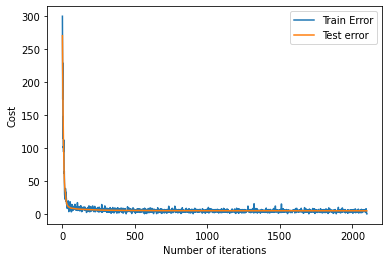

In [ ]:
plt.plot(train_err)
plt.plot(test_err)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
def r2_score(y_real,y_pred):
    corr_coef = np.corrcoef(y_real,y_pred)[0][1]
    r2 = corr_coef**2
    return r2

def MSE(y_real,y_pred):

    m = np.square(np.subtract(y_real,y_pred)).mean()
    return m

In [ ]:
y_pred1=pd.DataFrame(y_pred,columns=['Cooling Load'])

In [ ]:
r2=r2_score(y_test.iloc[:,0],y_pred1.iloc[:,0])
r2

0.8955348353162539

In [ ]:
metric=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)
metric

3.0806129044289704e+169

In [ ]:
train_err_epoch_32=optimizer.get_cost_train_epoch()
test_err_epoch_32=optimizer.get_cost_test_epoch()

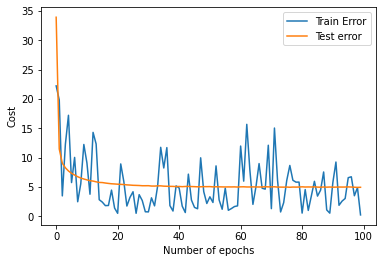

In [ ]:
plt.plot(train_err_epoch_32)
plt.plot(test_err_epoch_32)

labels=['Train Error','Test error']
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

Batch size 8

In [ ]:
optimizer = Mini_batch_GD(lr=0.0001,batch_size=8, max_iters=100)
model = LinearRegression()
y_pred=model.fit_plot(X_train,y_train.iloc[:,:1].values,X_test,y_test.iloc[:,:1].values,optimizer).predict(X_test)


In [ ]:
y_pred1=pd.DataFrame(y_pred,columns=['Cooling Load'])

In [ ]:
metric=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)
metric

12.710755017799409

In [ ]:
train_err=optimizer.get_cost_train()
test_err=optimizer.get_cost_test()

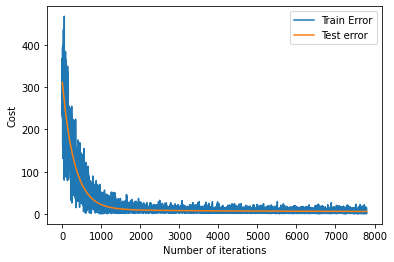

In [ ]:
plt.plot(train_err)
plt.plot(test_err)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
train_err_epoch_8=optimizer.get_cost_train_epoch()
test_err_epoch_8=optimizer.get_cost_test_epoch()

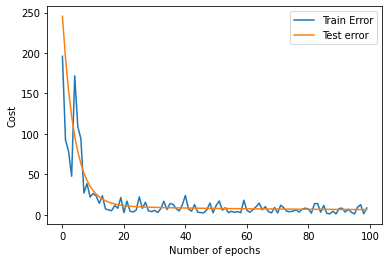

In [ ]:
plt.plot(train_err_epoch_8)
plt.plot(test_err_epoch_8)
labels=['Train Error','Test error']
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

Batch size 16

In [ ]:
optimizer = Mini_batch_GD(lr=0.001,batch_size=16, max_iters=100)
model = LinearRegression()
y_pred=model.fit_plot(X_train,y_train.iloc[:,:1].values,X_test,y_test.iloc[:,:1].values,optimizer).predict(X_test)


In [ ]:
y_pred1=pd.DataFrame(y_pred,columns=['Cooling Load'])

In [ ]:
metric=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)
metric

9.96276956729629

In [ ]:
train_err=optimizer.get_cost_train()
test_err=optimizer.get_cost_test()

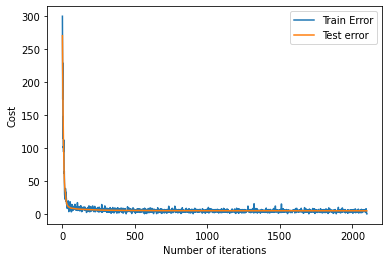

In [ ]:
plt.plot(train_err)
plt.plot(test_err)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
train_err_epoch_16=optimizer.get_cost_train_epoch()
test_err_epoch_16=optimizer.get_cost_test_epoch()

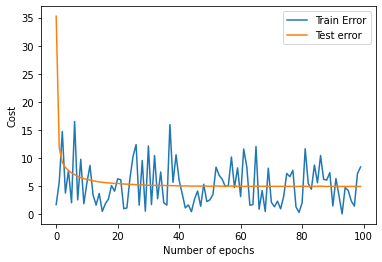

In [ ]:
plt.plot(train_err_epoch_16)
plt.plot(test_err_epoch_16)

labels=['Train Error','Test error']
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

Batch size 64

In [ ]:
optimizer = Mini_batch_GD(lr=0.01,batch_size=64, max_iters=100)
model = LinearRegression()
y_pred=model.fit_plot(X_train,y_train.iloc[:,:1].values,X_test,y_test.iloc[:,:1].values,optimizer).predict(X_test)


In [ ]:
y_pred1=pd.DataFrame(y_pred,columns=['Cooling Load'])

In [ ]:
metric=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)
metric

10.140607141754435

In [ ]:
train_err=optimizer.get_cost_train()
test_err=optimizer.get_cost_test()

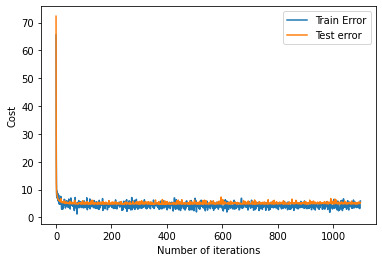

In [ ]:
plt.plot(train_err)
plt.plot(test_err)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
train_err_epoch_64=optimizer.get_cost_train_epoch()
test_err_epoch_64=optimizer.get_cost_test_epoch()

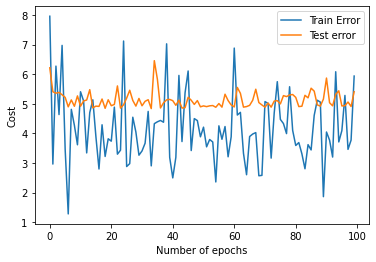

In [ ]:
plt.plot(train_err_epoch_64)
plt.plot(test_err_epoch_64)
labels=['Train Error','Test error']
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

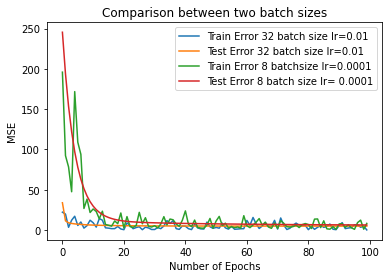

In [ ]:

plt.plot(train_err_epoch_32, label='Train Error 32 batch size lr=0.01')
plt.plot(test_err_epoch_32, label='Test Error 32 batch size lr=0.01')
plt.plot(train_err_epoch_8, label='Train Error 8 batchsize lr=0.0001')
plt.plot(test_err_epoch_8, label = 'Test Error 8 batch size lr= 0.0001')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title('Comparison between two batch sizes')
plt.legend()


plt.show()

batch size 128

In [ ]:
optimizer = Mini_batch_GD(lr=0.01,batch_size=128, max_iters=100)
model = LinearRegression()
y_pred=model.fit_plot(X_train,y_train.iloc[:,:1].values,X_test,y_test.iloc[:,:1].values,optimizer).predict(X_test)


In [ ]:
y_pred1=pd.DataFrame(y_pred,columns=['Cooling Load'])

In [ ]:
metric=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)
metric

1.1810983858016048e+170

In [ ]:
train_err=optimizer.get_cost_train()
test_err=optimizer.get_cost_test()

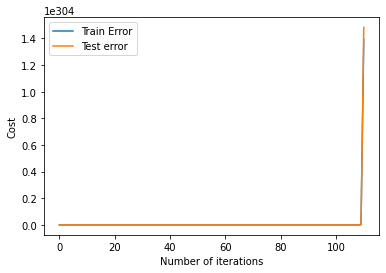

In [ ]:
plt.plot(train_err)
plt.plot(test_err)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
##With batch size 128, it explodes.

In [ ]:
##Second Target : Cooling Load

In [ ]:
optimizer = Mini_batch_GD(lr=0.01,batch_size=64, max_iters=100)
model = LinearRegression()
y_pred_second_target=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)


In [ ]:
train_err2=optimizer.get_cost_train()
test_err2=optimizer.get_cost_test()

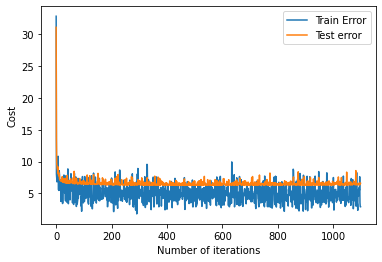

In [ ]:
plt.plot(train_err2)
plt.plot(test_err2)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
train_err_epoch2=optimizer.get_cost_train_epoch()
test_err_epoch2=optimizer.get_cost_test_epoch()

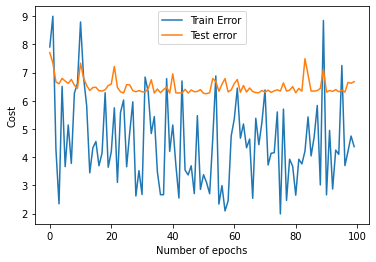

In [ ]:
plt.plot(train_err_epoch2)
plt.plot(test_err_epoch2)
labels=['Train Error','Test error']
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
MB_weights_2target=model.w
MB_weights_2target

array([[-7.23296989],
       [ 3.52133359],
       [19.65346952],
       [ 6.14525129],
       [12.45826479]])

In [ ]:
model_CF.w[:,1]

array([-8.04492209,  2.80034256, 20.56271189,  6.10406754, 12.81922164])

In [ ]:
y_pred2=pd.DataFrame(y_pred_second_target,columns=['Cooling Load'])

In [ ]:
r2=r2_score(y_test.iloc[:,1],y_pred2.iloc[:,0])
r2

0.8519929760765422

In [ ]:
metric=MSE(y_test.iloc[:,1].values,y_pred2.iloc[:,0].values)
metric

12.972707077246167

Batch size 32

In [ ]:
optimizer = Mini_batch_GD(lr=0.01,batch_size=32, max_iters=100)
model = LinearRegression()
y_pred_second_target=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)


In [ ]:
train_err2=optimizer.get_cost_train()
test_err2=optimizer.get_cost_test()

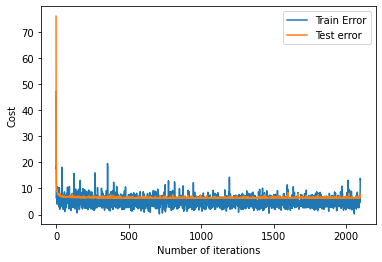

In [ ]:
plt.plot(train_err2)
plt.plot(test_err2)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

Batch size 16

In [ ]:
optimizer = Mini_batch_GD(lr=0.001,batch_size=16, max_iters=100)
model = LinearRegression()
y_pred_second_target=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)


In [ ]:
train_err2=optimizer.get_cost_train()
test_err2=optimizer.get_cost_test()

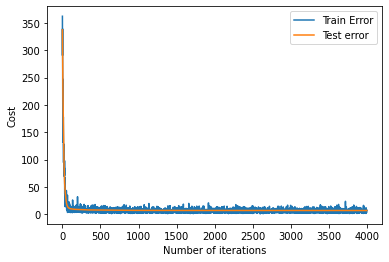

In [ ]:
plt.plot(train_err2)
plt.plot(test_err2)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
y_pred2=pd.DataFrame(y_pred_second_target,columns=['Cooling Load'])

In [ ]:
r2=r2_score(y_test.iloc[:,1],y_pred2.iloc[:,0])
r2

0.8519419406724407

In [ ]:
metric=MSE(y_test.iloc[:,1].values,y_pred2.iloc[:,0].values)
metric

13.021715441357236

Batch size 8

In [ ]:
optimizer = Mini_batch_GD(lr=0.001,batch_size=8, max_iters=100)
model = LinearRegression()
y_pred_second_target=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)


In [ ]:
train_err2=optimizer.get_cost_train()
test_err2=optimizer.get_cost_test()

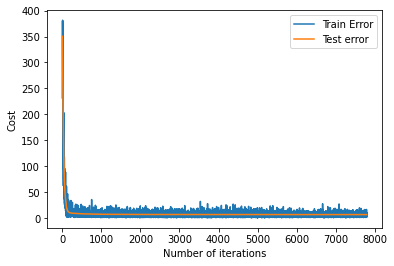

In [ ]:
plt.plot(train_err2)
plt.plot(test_err2)
labels=['Train Error','Test error']
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
#plt.ylim(0,10)
plt.legend(labels)
plt.show()

In [ ]:
y_pred2=pd.DataFrame(y_pred_second_target,columns=['Cooling Load'])

In [ ]:
r2=r2_score(y_test.iloc[:,1],y_pred2.iloc[:,0])
r2

0.852003191442639

In [ ]:
metric=MSE(y_test.iloc[:,1].values,y_pred2.iloc[:,0].values)
metric

12.997491286419432

In [ ]:
##Different batch_sizes

In [ ]:

for batch_size in [8,16,32,64,128]:
  optimizer = Mini_batch_GD(lr=0.01,batch_size=batch_size, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  y_pred1=pd.DataFrame(y_pred,columns=['Heating Load'])
  r2=r2_score(y_test.iloc[:,0],y_pred1.iloc[:,0])
  mse=MSE(y_test.iloc[:,0].values,y_pred1.iloc[:,0].values)

  wei=model.w
  weight_results = "Weights of the model for the first target for mini_batch {k} are  {weights} ".format(k=batch_size, weights = wei )
  r2score_results = "R2 score of the model for the first target for mini_batch {k} is  {score} ".format(k=batch_size, score = r2 )
  MSE_results = "MSE of the model for the first target for mini_batch {k} is  {mse} ".format(k=batch_size, mse = mse )


  print(weight_results)
  print(r2score_results)
  print(MSE_results)







Weights of the model for the first target for mini_batch 8 are  [[-5.79708755]
 [ 5.73527557]
 [19.97367758]
 [ 8.39030714]
 [ 7.42498558]] 
R2 score of the model for the first target for mini_batch 8 is  0.895132745492084 
MSE of the model for the first target for mini_batch 8 is  10.089461155975993 
Weights of the model for the first target for mini_batch 16 are  [[-5.98219703]
 [ 5.67867809]
 [19.75150094]
 [ 8.12448005]
 [ 7.16230605]] 
R2 score of the model for the first target for mini_batch 16 is  0.8948461498766875 
MSE of the model for the first target for mini_batch 16 is  9.830468513777204 
Weights of the model for the first target for mini_batch 32 are  [[-5.74011568]
 [ 5.70335477]
 [19.9737627 ]
 [ 8.08761092]
 [ 7.30541341]] 
R2 score of the model for the first target for mini_batch 32 is  0.8951076450726856 
MSE of the model for the first target for mini_batch 32 is  9.875336984143738 
Weights of the model for the first target for mini_batch 64 are  [[-5.77878186]
 [ 5.

In [ ]:
for batch_size in [8,16,32,64,128]:
  optimizer = Mini_batch_GD(lr=0.01,batch_size=batch_size, max_iters=100)
  model = LinearRegression()
  y_pred_sec=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)
  y_pred2=pd.DataFrame(y_pred_sec,columns=['Cooling Load'])
  r2=r2_score(y_test.iloc[:,0],y_pred2.iloc[:,0])
  mse=MSE(y_test.iloc[:,0],y_pred2.iloc[:,0].values)

  wei=model.w
  weight_results = "Weights of the model for the second target for mini_batch {k} are  {weights} ".format(k=batch_size, weights = wei )
  r2score_results = "R2 score of the model for the second target for mini_batch {k} is  {score} ".format(k=batch_size, score = r2 )
  MSE_results = "MSE of the model for the second target for mini_batch {k} is  {mse} ".format(k=batch_size, mse = mse )


  print(weight_results)
  print(r2score_results)
  print(MSE_results)




Weights of the model for the second target for mini_batch 8 are  [[-7.5893332 ]
 [ 3.1213951 ]
 [20.13912669]
 [ 6.24092876]
 [12.63763605]] 
R2 score of the model for the second target for mini_batch 8 is  0.8892162170669381 
MSE of the model for the second target for mini_batch 8 is  17.166073777438786 
Weights of the model for the second target for mini_batch 16 are  [[-7.51482213]
 [ 3.20548614]
 [20.10033308]
 [ 6.220345  ]
 [12.60702526]] 
R2 score of the model for the second target for mini_batch 16 is  0.8892836183895955 
MSE of the model for the second target for mini_batch 16 is  17.17714506962638 
Weights of the model for the second target for mini_batch 32 are  [[-7.58107817]
 [ 3.16559115]
 [20.10918059]
 [ 6.17788047]
 [12.62281179]] 
R2 score of the model for the second target for mini_batch 32 is  0.8890654175348116 
MSE of the model for the second target for mini_batch 32 is  16.949766433299242 
Weights of the model for the second target for mini_batch 64 are  [[-7.232

In [ ]:
#Batch_size=32 is the best let's try varying its learning rate for the Heating Load

In [ ]:
##With lr =0.1 , it explodes

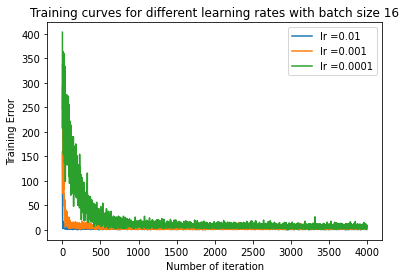

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=16, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 16')
plt.show()

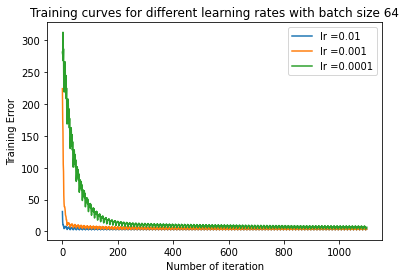

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=64, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 64')
plt.show()

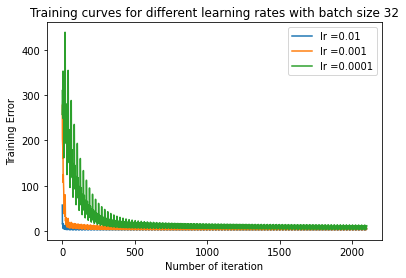

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=32, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 32')
plt.show()



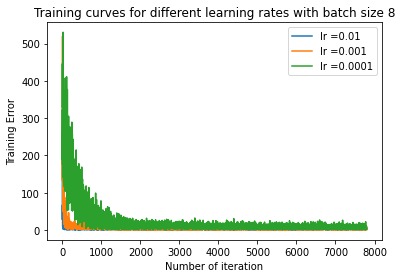

In [ ]:

for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=8, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 8')
plt.show()


In [ ]:
##Second target Cooling Load

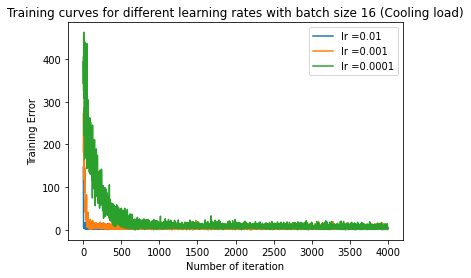

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=16, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 16 (Cooling load)')
plt.show()

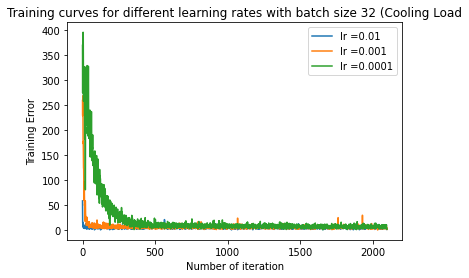

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=32, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 32 (Cooling Load')
plt.show()

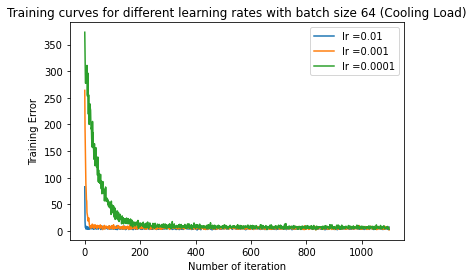

In [ ]:
for lr in [0.01,0.001,0.0001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=64, max_iters=100)
  model = LinearRegression()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'lr ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 64 (Cooling Load)')
plt.show()

In [ ]:
##Learning Curves

In [ ]:
def Mini_batch_SGD2(X_train,y_train,X_test,y_test, lr=0.01,batch_size=8,bias=True):

  if X_train.ndim == 1:

    X_train = X_train[:,None]
    X_test = X_test[:,None]

  N = X_train.shape[0]
  N0= X_test.shape[0]
  if bias:
      X_train = np.column_stack([X_train,np.ones(N)])
      X_test = np.column_stack([X_test,np.ones(N0)])
  w = np.zeros((X_train.shape[1],1))

  epochs=100
  for epoch in range(epochs):
      mini_batches = create_mini_batches(X_train, y_train, batch_size)
      for mini_batch in mini_batches:
        X_mini, y_mini = mini_batch
        w = w - lr * gradient(X_mini, y_mini, w)
  train=cost_fun(X_mini, y_mini, w)
  test=cost_fun(X_test,y_test,w)


  return train, test[0]




In [ ]:

def sample_size(k):
  target=['Cooling Load','Heating Load']
  X=df_new[columns].copy()
  y=df[target]

  X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=5,
                                   train_size=k,
                                   shuffle=True)

  train_err,test_err=Mini_batch_SGD2(X_train,y_train.iloc[:,1:],X_test,y_test.iloc[:,1:], lr=0.01,batch_size=32,bias=True)
  return train_err,test_err

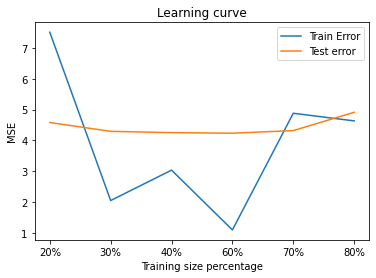

In [ ]:
l=[]
l2=[]
label=['Train error','Test Error']
x_axes=['20%','30%','40%','60%','70%','80%']

for k in [0.2,0.3,0.4,0.6,0.7,0.8]:

  train_err,test_err=sample_size(k)
  l.append(train_err)
  l2.append(test_err)
plt.plot(x_axes,l)
plt.plot(x_axes,l2)

plt.legend(labels)
plt.xlabel('Training size percentage')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.show()

## 2- Dataset 2

In [ ]:
# Mohamad Login directory
data = "/content/drive/MyDrive/Qualitative_Bankruptcy.data.txt"
file1 = open(data, "r")


In [ ]:
datapoint = file1.read()
print(datapoint)


In [ ]:
#Mohamad Login
import pandas as pd
df2=pd.read_csv(r'/content/drive/MyDrive/Qualitative_Bankruptcy.data.txt',dtype="category")



In [ ]:
df2.shape

(249, 7)

In [ ]:
#add column names
df2.columns = [ "Industrial_Risk"
     ,"Management_Risk"
     ,"Financial_Flexibility"
     ,"Credibility"
     ,"Competitiveness"
     ,"Operating_Risk","Class"]

In [ ]:
df2

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Industrial_Risk        249 non-null    category
 1   Management_Risk        249 non-null    category
 2   Financial_Flexibility  249 non-null    category
 3   Credibility            249 non-null    category
 4   Competitiveness        249 non-null    category
 5   Operating_Risk         249 non-null    category
 6   Class                  249 non-null    category
dtypes: category(7)
memory usage: 2.7 KB


In [ ]:
df2.shape

(249, 7)

turn to binary with one hot encoding

In [ ]:
#df2_Risk = pd.get_dummies(df2.iloc[:,1])



In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from numpy import argmax


**2-1 Data cleaning**

Coverting the caetgorical dataset into dummy varibles

In [ ]:

df3=df2. copy()
#df3['Industrial_Risk'] = labelencoder.fit_transform(df3['Industrial_Risk'])
#df3['Management_Risk'] = labelencoder.fit_transform(df3['Management_Risk'])
#df3['Financial_Flexibility'] = labelencoder.fit_transform(df3['Financial_Flexibility'])
#df3['Credibility'] = labelencoder.fit_transform(df3['Credibility'])
#df3['Competitiveness'] = labelencoder.fit_transform(df3['Competitiveness'])
#df3['Operating_Risk'] = labelencoder.fit_transform(df3['Operating_Risk'])

df3 = pd.get_dummies(df3, columns=['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility', 'Credibility', 'Competitiveness', 'Operating_Risk'])


In [ ]:
df3['Bankrupt'] = (df3['Class'] == 'B').apply(np.uint8)
df3.drop('Class', axis=1, inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Industrial_Risk_A        249 non-null    uint8
 1   Industrial_Risk_N        249 non-null    uint8
 2   Industrial_Risk_P        249 non-null    uint8
 3   Management_Risk_A        249 non-null    uint8
 4   Management_Risk_N        249 non-null    uint8
 5   Management_Risk_P        249 non-null    uint8
 6   Financial_Flexibility_A  249 non-null    uint8
 7   Financial_Flexibility_N  249 non-null    uint8
 8   Financial_Flexibility_P  249 non-null    uint8
 9   Credibility_A            249 non-null    uint8
 10  Credibility_N            249 non-null    uint8
 11  Credibility_P            249 non-null    uint8
 12  Competitiveness_A        249 non-null    uint8
 13  Competitiveness_N        249 non-null    uint8
 14  Competitiveness_P        249 non-null    uint8
 15  Operat

**2-2- Logistic model**

In [ ]:
X2=df3.iloc[:,0:18]
X2


,Industrial_Risk_A,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_A,Management_Risk_N,Management_Risk_P,Financial_Flexibility_A,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating_Risk_A,Operating_Risk_N,Operating_Risk_P
0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
245,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
246,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
247,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
#y2_s having the data as series, y2_df dataframe version of the same dataset
y2_s=df3.iloc[:,18]
y2_df = y2_s.to_frame(name="Bankrupt")


In [ ]:
#spliting the dataset into traing and test set 80/20
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X2,y2_df ,
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)

X_test.shape
y_test.shape

(50, 1)

Define Gradient Descent algorithm

In [ ]:
#Logistic function
logistic = lambda z: 1./ (1 + np.exp(-z))

In [ ]:
#Cost function
def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

In [ ]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

The Gradient Descent method for solving the Logistic Regression

In [ ]:
class GradientDescent:

    def __init__(self, learning_rate=.01, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

Wrting a class funtion for logistic regression and define the weight to recall

Define the Logisitic Regression

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.01, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    def fit_plot(self, x, y,x_test,y_test,optimizer):


        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        def cost_fun1(X, y, w):
          N=X.shape[0]
          yh = logistic(np.dot(x, self.w))
          J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
          return J
        def cost_fun(X,y,w):
          N=X.shape[0]
          yh = np.dot(X, w)


          J=(1/2)*np.square(np.subtract(y,yh)).mean()
          return J
    def weight(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'the weight found: {self.w}')
        return self.w

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient            #initialize the gradient method of the LogisticRegression class with gradient function

The 4 learning rate for Gradient Descent Logistic regression

In [ ]:
#learning rate (0.001, 0.01, 0.05, 0.1)
model1 = LogisticRegression(learning_rate = 0.001)
model2= LogisticRegression(learning_rate = 0.01)
model3 = LogisticRegression(learning_rate = 0.05)
model4 = LogisticRegression(learning_rate = 0.1)

y_train1 =y_train.squeeze()
y_pred1=model1.fit(X_train,y_train1).predict(X_test)
y_pred2=model2.fit(X_train,y_train1).predict(X_test)
y_pred3=model3.fit(X_train,y_train1).predict(X_test)
y_pred4=model4.fit(X_train,y_train1).predict(X_test)



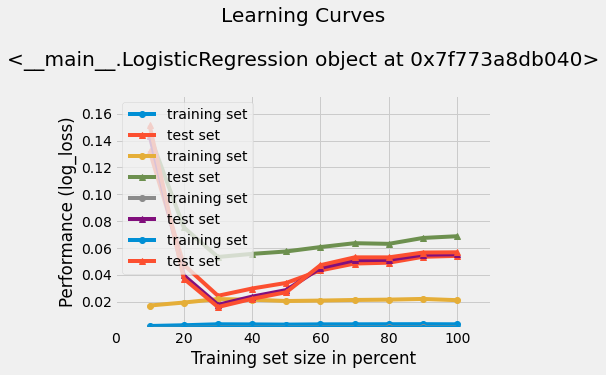

In [ ]:
#learning curve for diffrent training size
from mlxtend.plotting import plot_learning_curves

# Loading some example data
y_test1=y_test.squeeze()


plot_learning_curves(X_train, y_train1, X_test, y_test1, model2,scoring = 'log_loss')
plot_learning_curves(X_train, y_train1, X_test, y_test1, model1,scoring = 'log_loss')
plot_learning_curves(X_train, y_train1, X_test, y_test1, model3,scoring = 'log_loss')
plot_learning_curves(X_train, y_train1, X_test, y_test1, model4,scoring = 'log_loss')
plt.show()

In [ ]:
#metric for evluation of regression
def r2_score(y_real,y_pred):
    corr_coef = np.corrcoef(y_real,y_pred)[0][1]
    r2 = corr_coef**2
    return r2

def MSE(y_real,y_pred):
    m = np.square(np.subtract(y_real,y_pred)).mean()
    return m

def Loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def accuracy(y_pred,y_test):
    return np.mean(y_pred==y_test)


In [ ]:
y_test1=y_test.squeeze()

In [ ]:
# weight for the best model logistic regression based on accuarcy (learning rate = 0.05)
weights= model3.weight(X_train,y_train1)


In [ ]:
weights

array([-0.84170746,  0.21051922, -0.58760995, -1.32320374,  0.90209938,
       -0.79769384, -2.90882551,  4.08927091, -2.39924359, -1.20799273,
        3.32487786, -3.33568332, -1.85412624,  5.53040944, -4.89508139,
        0.09243043,  0.31509346, -1.62632208, -1.21879819])

In [ ]:
#learning rate equal to 0.001
y_test1=y_test.squeeze()
metric=MSE(y_test1,y_pred1)
R2=r2_score(y_test1,y_pred1)
loss= Loss(y_test1,y_pred1)
print('Loss function value',loss)
print('Mean Absolute Error is', metric)
print('r2 score is', R2)


Loss function value -0.003468830944662702
Mean Absolute Error is 0.019430459950313627
r2 score is 0.9182663870314492


In [ ]:
#learning rate equal to 0.01
y_test1=y_test.squeeze()
metric=MSE(y_test1,y_pred2)
R2=r2_score(y_test1,y_pred2)
loss= Loss(y_test1,y_pred2)
print('Loss function value',loss)
print('Mean Absolute Error is', metric)
print('r2 score is', R2)


Loss function value 0.017345090839262577
Mean Absolute Error is 0.019578644087098817
r2 score is 0.9172198678865485


In [ ]:
#learning rate equal to 0.05
y_test1=y_test.squeeze()
metric=MSE(y_test1,y_pred3)
R2=r2_score(y_test1,y_pred3)
loss= Loss(y_test1,y_pred3)
print('Loss function value',loss)
print('Mean Absolute Error is', metric)
print('r2 score is', R2)


Loss function value 0.03121013131574243
Mean Absolute Error is 0.01941332535519961
r2 score is 0.9183297319734987


In [ ]:
#learning rate equal to 0.1
y_test1=y_test.squeeze()
metric=MSE(y_test1,y_pred4)
R2=r2_score(y_test1,y_pred4)
loss= Loss(y_test1,y_pred4)
print('Loss function value',loss)
print('Mean Absolute Error is', metric)
print('r2 score is', R2)


Loss function value 0.03704029433789951
Mean Absolute Error is 0.019216860951478634
r2 score is 0.9193206098466417


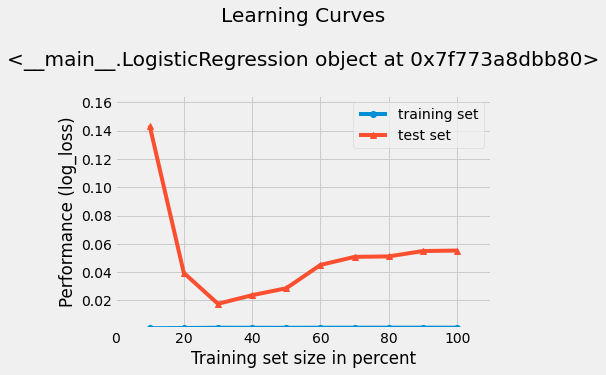

In [ ]:
from mlxtend.plotting import plot_learning_curves


#learning curve for the best model with learning rates of 0.05 log loss function


plot_learning_curves(X_train, y_train1, X_test, y_test1, model3,scoring = 'log_loss')
plt.show()

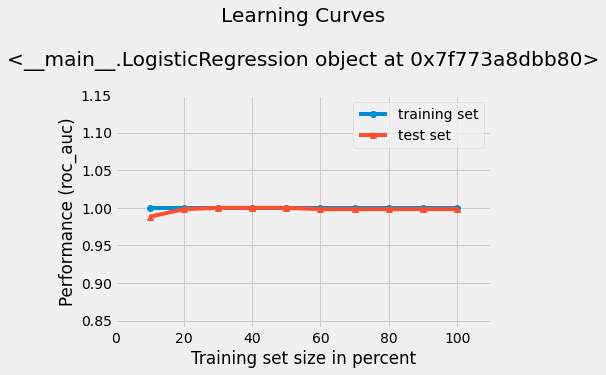

In [ ]:
from mlxtend.plotting import plot_learning_curves


#learning curve for the best model with learning rates of 0.05, area onther the ROC-AUC is 0.998

plot_learning_curves(X_train, y_train1, X_test, y_test1, model3,scoring = 'roc_auc')
plt.show()

In [ ]:
y_train.iloc[:,:1]

In [ ]:
#confusion matrix for learning rates of (0.001, 0.01, 0.05, 0.1) to evaulte the model performance
from sklearn import metrics
y_pred_1=np.round_(y_pred1)
y_pred_2=np.round_(y_pred2)
y_pred_3=np.round_(y_pred3)
y_pred_4=np.round_(y_pred4)


cnf_matrix1 = metrics.confusion_matrix(y_test1, y_pred_1)
cnf_matrix2 = metrics.confusion_matrix(y_test1, y_pred_2)
cnf_matrix3 = metrics.confusion_matrix(y_test1, y_pred_3)
cnf_matrix4 = metrics.confusion_matrix(y_test1, y_pred_4)

In [ ]:
cnf_matrix1

array([[30,  1],
       [ 1, 18]])

In [ ]:
#learning rate 0.001
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
#learning rate 0.01
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
#learning rate 0.05
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
#learning rate 0.1
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test1, y_pred3)

0.9983022071307299

In [ ]:
# this shape one of the way to show the performance of the model with area under curve highest value would be 1.00
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(Y_test, model_probs):

  # calculate AUC
  model_auc = roc_auc_score(Y_test, model_probs)
  # summarize score
  print('Model: ROC AUC=%.3f' % (model_auc))

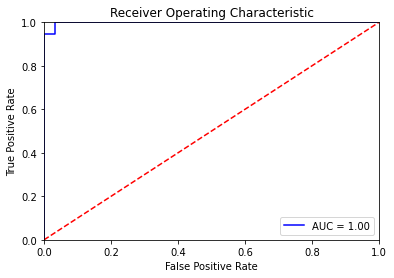

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test1, y_pred1)

roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**2-2 Mini Batch SGD**

In [ ]:
import time


# function to compute gradient of error function w.r.t. weights


def gradient(X, y, w):
	yh = logistic(np.dot(X, w))
	grad = np.dot(X.transpose(), (yh - y))
	return grad

# function to compute the error for current values of weights


def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

# function to create a list containing several mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	j = 0

	for j in range(n_minibatches + 1):
		mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[j * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	return mini_batches



In [ ]:

def Mini_batch_SGD(X_train,y_train,X_test,y_test, learning_rate=0.01,batch_size=8,bias=True):

  if X_train.ndim == 1:

    X_train = X_train[:,None]
    X_test = X_test[:,None]

  N = X_train.shape[0]
  N0= X_test.shape[0]
  if bias:
      X_train = np.column_stack([X_train,np.ones(N)])
      X_test = np.column_stack([X_test,np.ones(N0)])
  w = np.zeros((X_train.shape[1],1))
  cost_list=[]
  cost_err=[]
  epochs=100
  for epoch in range(epochs):
      mini_batches = create_mini_batches(X_train, y_train, batch_size)
      for mini_batch in mini_batches:
        X_mini, y_mini = mini_batch
        w = w - learning_rate * gradient(X_mini, y_mini, w)
        cost_list.append(cost_fn(X_mini, y_mini, w))
        cost_err.append((cost_fn(X_test,y_test,w)))


  return w , cost_list, cost_err



In [ ]:
X_test.head()

,Industrial_Risk_A,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_A,Management_Risk_N,Management_Risk_P,Financial_Flexibility_A,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating_Risk_A,Operating_Risk_N,Operating_Risk_P
75,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
66,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
52,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
51,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
99,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0


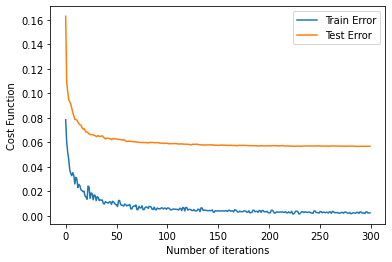

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=128,bias=True)

plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

In [ ]:
test_err[-1]

Bankrupt    0.054543
dtype: float64

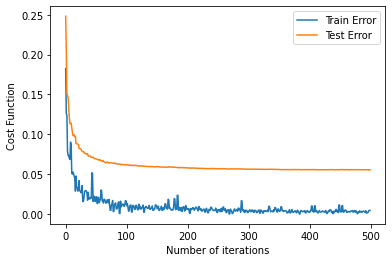

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=64,bias=True)

plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

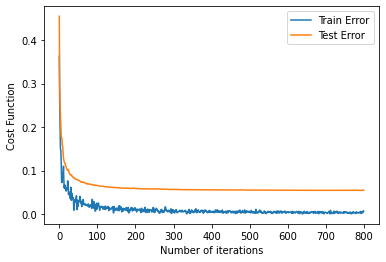

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=32,bias=True)

plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

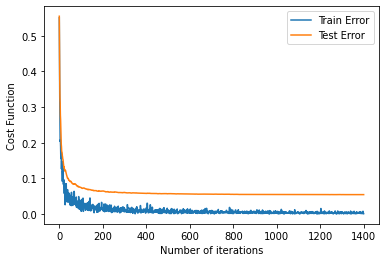

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=16,bias=True)

plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

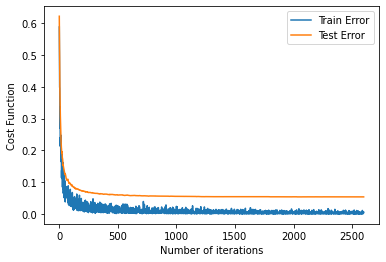

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=8,bias=True)
time.time()
plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

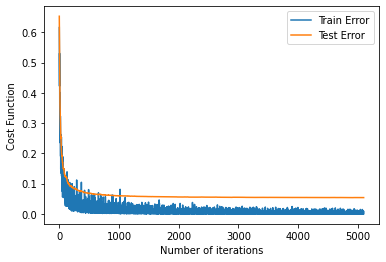

In [ ]:
w , cost_list1,test_err = Mini_batch_SGD (X_train , y_train.iloc[:,:1], X_test, y_test.iloc[:,:1], learning_rate=0.05, batch_size=4,bias=True)

plt.plot(cost_list1)
labels=['Train Error','Test Error']
plt.plot(test_err)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.legend(labels)
plt.show()

In [ ]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))
def loss(x,w,y,b):
    s=sigmoid(x,w,b)
    return np.mean(-(y*np.log(s))- ((1-y)*np.log(1-s)))
def grad(x,y,w,b):
    s=sigmoid(x,w,b)
    return np.dot(x.T,(s-y))/x.shape[0]

In [ ]:
class LogisticRegression2:

    def __init__(self,add_bias=True):
        self.add_bias = add_bias
        #self.max_iter=max_iter
        #self.batch_size=batch_size
        #self.lr=lr
        pass

    def fit_plot(self, x, y,x_test,y_test,optimizer):


        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def cost_fun1(X, y, w):
          N=X.shape[0]
          z = np.dot(x, w)
          J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
          return J
        def cost_fun(X,y,w):
          N=X.shape[0]
          z = np.dot(x, w)
          J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
          return J

        def create_mini_batches(X, y, batch_size):
          mini_batches = []
          data = np.hstack((X, y))
          np.random.shuffle(data)
          n_minibatches = data.shape[0] // batch_size
          j = 0
          for j in range(n_minibatches + 1):
            mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
          if data.shape[0] % batch_size != 0:
              mini_batch = data[j * batch_size:data.shape[0]]
              X_mini = mini_batch[:, :-1]
              Y_mini = mini_batch[:, -1].reshape((-1, 1))
              mini_batches.append((X_mini, Y_mini))
          return mini_batches
        w=np.zeros(D)
        self.w = optimizer.run2(gradient, x, y,x_test,y_test, w)      # run the optimizer to get the optimal weights
        return self



    def fit(self, x, y):


        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def cost_fun(X, y, w):
          N=X.shape[0]
          z = np.dot(x, w)
          J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
          return J

        def create_mini_batches(X, y, batch_size):
          mini_batches = []
          data = np.hstack((X, y))
          np.random.shuffle(data)
          n_minibatches = data.shape[0] // batch_size
          j = 0
          for j in range(n_minibatches + 1):
            mini_batch = data[j * batch_size:(j + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
          if data.shape[0] % batch_size != 0:
              mini_batch = data[j * batch_size:data.shape[0]]
              X_mini = mini_batch[:, :-1]
              Y_mini = mini_batch[:, -1].reshape((-1, 1))
              mini_batches.append((X_mini, Y_mini))
          return mini_batches

        def opti_run ( gradient,x,y,w):
          for epoch in range(100):
            mini_batches = create_mini_batches(x, y, 64)
            for mini_batch in mini_batches:
              X_mini, y_mini = mini_batch
              w = w - 0.01 * gradient(X_mini, y_mini, w)
          return w

        w = np.zeros(D)
        self.w = opti_run(gradient, x, y, w)      # run the optimizer to get the optimal weights

        return self

    def predict(self, x):
        N=x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

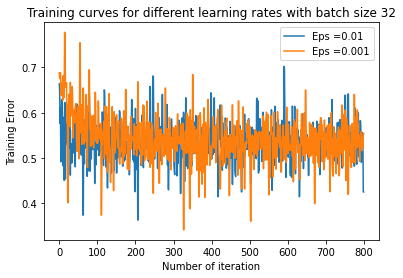

In [ ]:
for lr in [0.01,0.001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=32, max_iters=100)
  model = LogisticRegression2()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'Eps ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 32')
plt.show()

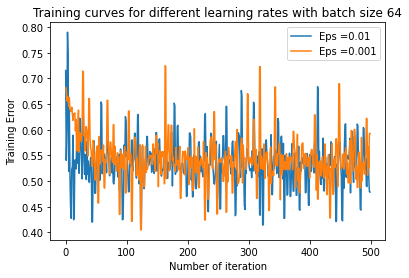

In [ ]:
for lr in [0.01,0.001]:
  optimizer = Mini_batch_GD(lr=lr,batch_size=64, max_iters=100)
  model = LogisticRegression2()
  y_pred=model.fit_plot(X_train,y_train.iloc[:,:1],X_test,y_test.iloc[:,:1],optimizer).predict(X_test)
  train_err=optimizer.get_cost_train()
  plt.plot(train_err, label= 'Eps ='+ str(lr))
  plt.xlabel("Number of iteration")
  plt.ylabel("Training Error")
  plt.legend()
  plt.title('Training curves for different learning rates with batch size 64')
plt.show()